# ML Classifications - Decision Tree

Dans ce cours, nous allons voir ce que sont les arbres de décision, comment les utiliser, et les avantages/inconvénients qu'ils ont par rapport aux autres algorithmes d'apprentissage automatique.

## Objectifs

- Comprendre le concept des arbres de décision
- Utiliser un algorithme d'arbre de décision

## Que sont les arbres de décision ?

Les algorithmes basés sur les arbres de décision sont très utilisés dans les applications d'apprentissage automatique. C'est le cas principalement en raison de leur flexibilité, car ils peuvent être utilisés pour des tâches de régression et de classification. Cependant, l**eur popularité tient également au fait qu'ils sont conceptuellement faciles à comprendre, ce qui permet une interprétation plus intuitive.**

Ils sont considérés comme faisant partie des algorithmes d'apprentissage automatique les plus faciles à interpréter, ce que l'on appelle les méthodes "boîte blanche". Ne vous y trompez pas, cependant, les arbres de décision ont aussi certaines limites. Lorsqu'ils sont utilisés sans aucune forme de régularisation, **ils ont tendance à s'adapter excessivement à l'ensemble d'apprentissage et à présenter de moins bonnes performances lors de la validation (overfitting)**. Un autre inconvénient est leur sensibilité à la division train-test. Les modèles d'arbres décisionnels sont instables à cet égard. Mais dans la pratique, on peut surmonter ce problème en utilisant l'analyse en composantes principales (ACP), qui remédie à cet inconvénient en assurant une orientation plus optimale des données d'entrée. Nous verrons cela plus tard.

> L'algorithme permettant de créer l'arbre et d'entraîner le modèle, est basé sur des équations mathématiques plus ou moins complexes.
Mais la prédiction est basée sur des règles simples, **des questions oui/non**, c'est ce qui le rend si populaire.

L'idée de base des arbres de décision est de segmenter l'espace de prédiction en un certain nombre de régions plus simples basées sur une règle binaire (Vrai ou Faux). À titre d'exemple, imaginez que vous disposez d'un ensemble de données simple comportant de nombreux animaux différents. Nous pourrions prédire de quel animal il s'agit, en posant des questions binaires simples.

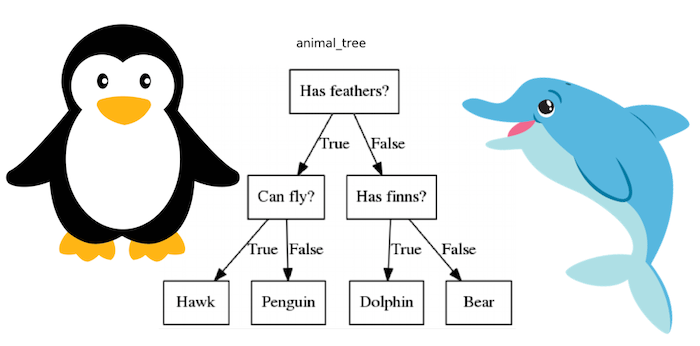



Voici d'autres exemples :

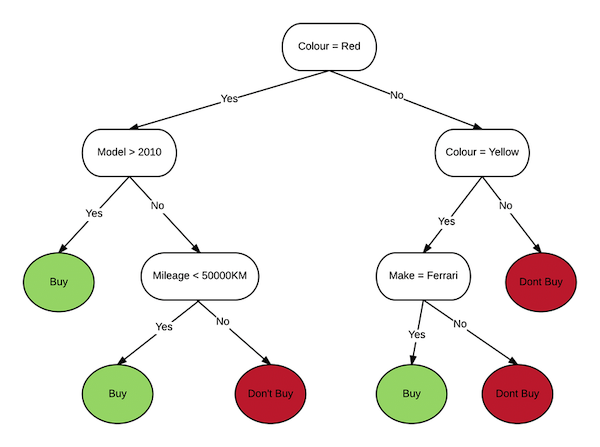


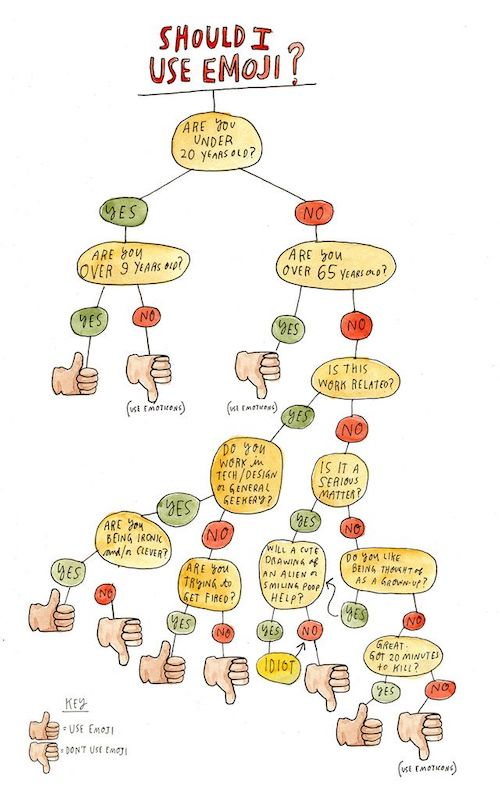

Il existe techniquement deux types d'arbres de décision : les **arbres de régression** et les **arbres de classification**. Comme tu peux le deviner, les arbres de régression sont utilisés pour les problèmes de régression, tandis que les arbres de classification sont utilisés pour les problèmes de classification.

## Comment entrainer un decision tree avec scikit-learn


Débutons avec le classificateur d'arbres de décision.

Avec scikit-learn, la syntaxe est toujours aussi simple. En fait, c'est la même syntaxe que pour les autres algorithmes.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
modelDTC = DecisionTreeClassifier()
modelDTC.fit(X_train, y_train)

Tu peux maintenant utiliser les fonctions predict(), predict_proba(), score() et confusion_matrix().

Et tu connais déjà le paramètre `class_weight`.


**Poursuivons avec la régression d'arbre de décision:**


In [ ]:
from sklearn.tree import DecisionTreeRegressor
modelDTR = DecisionTreeRegressor()
modelDTR.fit(X_train, y_train)

Tu peux maintenant utiliser la méthode `predict` et le `score` R2.



## Overfitting et élagage


Comme nous l'avons déjà laissé entendre, les algorithmes d'arbres de décision ont un problème : ils ont tendance à l'overfitting. Si tu calcules un score sur le jeu d'entraînement, tu obtiendras très souvent un accuracy score de 1, mais évidemment sur l'ensemble de test, le score sera beaucoup plus faible.

Par exemple, tu essayes de faire un arbre de décision sur les chats et les chiens en fonction de leur taille moyenne. Et dans ton jeu d'entraînement, il y a un chihuahua. L'arbre de décision prédit que les animaux de la taille d'un chihuahua sont des chiens. Mais les chats ont aussi cette taille. Tu peux sentir que la règle n'est pas bonne.

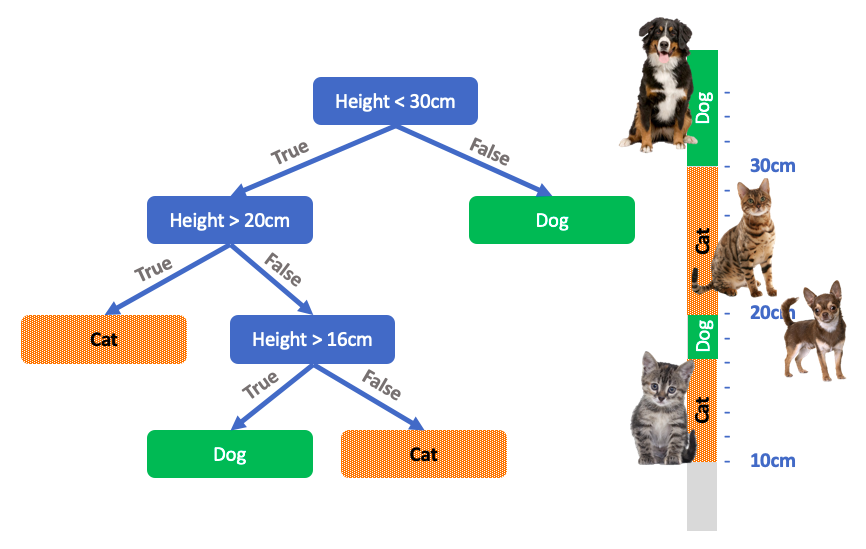


Nous allons donc procéder à un élagage (pruning en anglais) : nous allons couper les branches de l'arbre à un certain niveau. Le score du jeu d'entrainement sera moins bon. Mais la règle sera meilleure, et nous n'aurons plus d'overfitting. Notre modèle "généralise" mieux, mêmes s'il est moins précis.


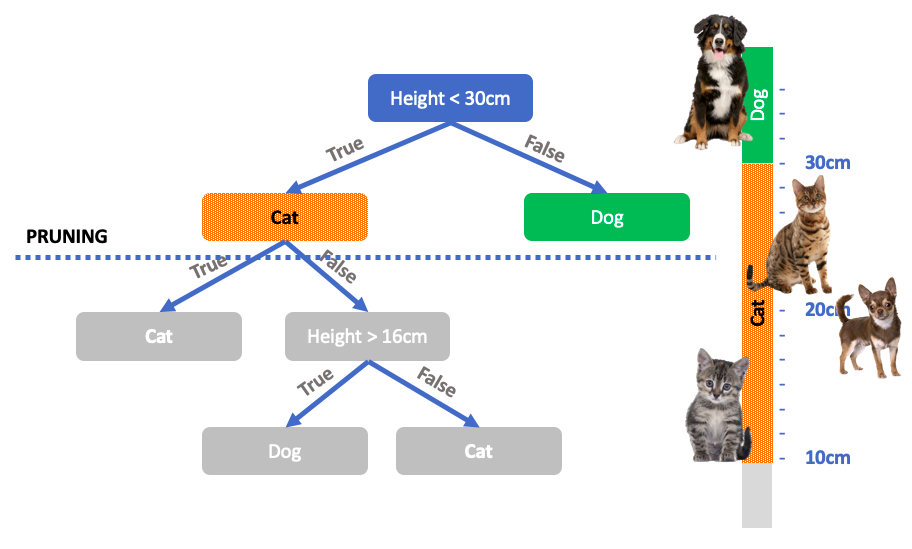

Avec scikit-learn, tu peux utiliser le paramètre `max_depth` :



In [ ]:
from sklearn.tree import DecisionTreeClassifier
modelDTC = DecisionTreeClassifier(max_depth = 3)
modelDTC.fit(X_train, y_train

Tu peux également consulter la documentation des paramètres suivants : `max_features` , `max_leaf_nodes`, `min_samples_leaf`, `min_samples_split`.


**Documentation Officielle**

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


## Feature importance


Un grand arbre est parfois difficile à lire. Et une même variable X peut apparaître à plusieurs niveaux. L'attribut `feature_importances_` te donne un pourcentage d'importance de l'utilisation de chaque variable dans ton modèle.

Par exemple, pour prédire mes animaux avec le poids et la taille, je trouve que la taille est beaucoup plus importante :

In [ ]:
X.columns

>>> ['height', 'weight']


In [ ]:
modelDTC.feature_importances_

>>> array([0.702222, 0.297778])

Cela signifie que la taille est 2 fois plus utilisée que le poids par mon modèle pour prédire l'animal.

## Afficher graphiquement l'arbre

Tu peux afficher le diagramme en utilisant ce code :



In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))
plot_tree(modelDTC, filled = True,  
          class_names = modelDTC.classes_, 
          feature_names=X_train.columns )
plt.show()

## Ressources :


Pour voir comment chacun de ces arbres de décision est créé, n'hésite pas à consulter les ressources suivantes pour une explication intuitive :

Cette vidéo de 15 minutes propose une introduction aux arbres de décision en général, et aux arbres de classification en particulier.

https://www.youtube.com/watch?v=7VeUPuFGJHk

# Challenge

Dans ce défi, tu vas implémenter des arbres de décision en utilisant Python et Scikit-Learn et en utilisant le [notebook suivant](https://drive.google.com/file/d/1lGZB9fB5fJroHMy8d9eek9GTp0V_APIt/view?usp=drive_link).